### INTRODUCTION
The scope of this project is to analyse survival and not survival rate in the titanic dataset
#### About Titanic
Titanic was a British ocean liner that sank in the early hours of 15 April 1912 as a result of striking an iceberg on her maiden voyage from Southampton, England, to New York City, United States. It was stated that over thousand of people lost their life in the accident making incident  been tag as one of the deadlist peacetime sinking of a single ship
#### The Dataset:
The dataset contains over 800 observation with 12 variable or columns,5 categorical columns, 5 interger or descrete columns and two float or continues varible
#### Question or insight to be generated
- Analyse the the survival by age distribution
- Passenger survival by Their Demography (gender, pclass)
- Ratio of survival by passenger class
- Age distribution of passengers that are with their family or spouse etc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df_titanic=pd.read_csv('/content/drive/MyDrive/data-elite/titanic.csv')
#df_titanic = pd.read_csv("/content/titanic.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age should be converted to int
Handle missing value in the age carbin and Embarked columns

In [ ]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_titanic.shape

(891, 12)

### FIXING MISSING VALUE IN AGE COLUMNS

In [ ]:
mean_age=df_titanic.groupby(['Pclass','Sex']).Age.mean()
mean_age

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [ ]:
def handle_missing_value(rows):
    if pd.isnull(rows['Age']):
        return mean_age[rows['Pclass'], rows['Sex']]
    else:
        return rows['Age']


In [ ]:
df_titanic['Age']=df_titanic.apply(handle_missing_value, axis=1)

### convert Age columns to int

In [ ]:
df_titanic['Age']=df_titanic['Age'].astype(int)

Question 1 Basic statistical analysis of the numerical data

In [ ]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.191919,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.313598,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### let be more specific, because looking at the passengerID, Survuved,P_class, SIBSP Parch should be a categorical variable but converted or  transformed to numerical. To get better analysis I will suggest we create a subset of the whole data containing only the Age and Fare columns


In [ ]:
df_numeric= df_titanic[['Age', 'Fare']]
df_numeric.describe()

,Age,Fare
count,891.000000,891.000000
mean,29.191919,32.204208
std,13.313598,49.693429
min,0.000000,0.000000
25%,21.000000,7.910400
50%,26.000000,14.454200
75%,36.000000,31.000000
max,80.000000,512.329200


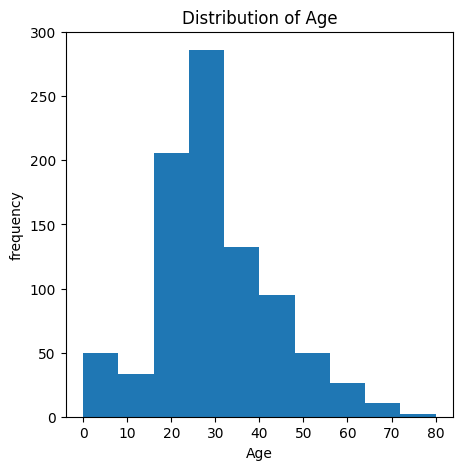

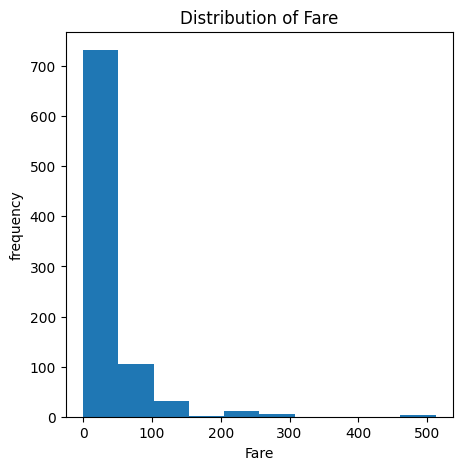

In [ ]:
for c in df_numeric.columns:
  plt.figure(figsize=(5,5))
  plt.hist(df_numeric[c], bins=10)
  plt.xlabel(f'{c}')
  plt.ylabel('frequency')
  plt.title(f'Distribution of {c}')
  plt.show()

### Visualized Passenger Demography with
> Age

> Sex

> Pclass

In [ ]:
df_titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

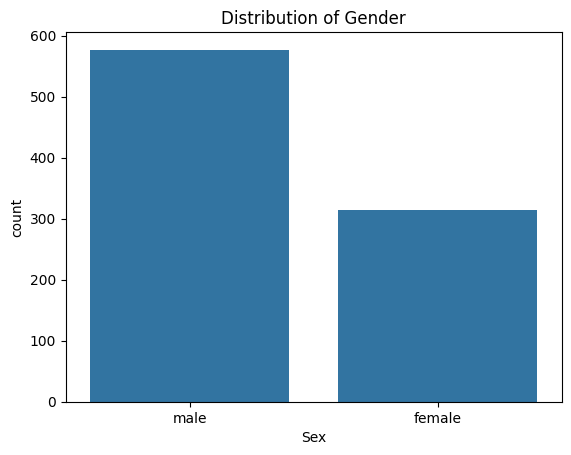

In [ ]:
sb.countplot(data=df_titanic, x='Sex')
plt.title('Distribution of Gender');

## **Survival Analysis**

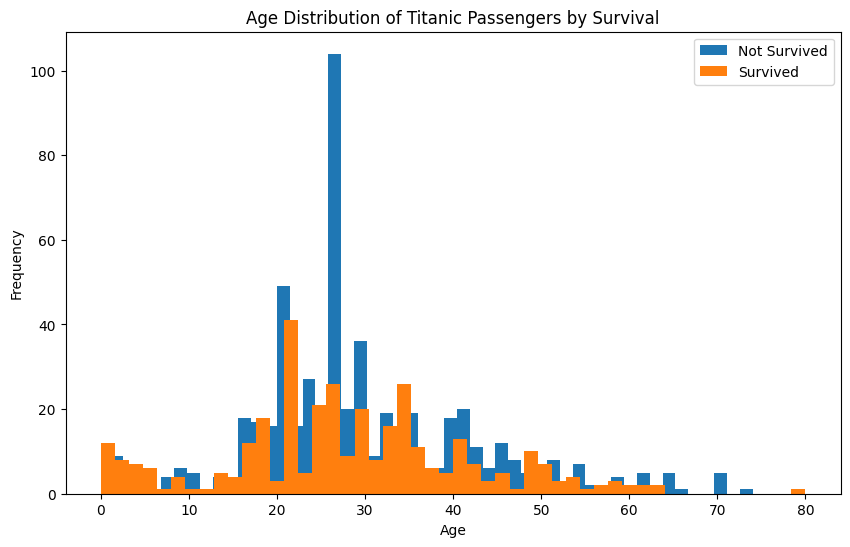

In [ ]:

plt.figure(figsize=(10, 6))
df_titanic.groupby("Survived")["Age"].plot(kind="hist", bins=50, legend=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Titanic Passengers by Survival")
plt.legend(["Not Survived", "Survived"])
plt.show()


The graph shows the age distribution of passengers who survive in the accident and those who lost their lifes.
- Infant and old people tend to have high survival rate
- passenger withing age range of 25-27 has highest number of un survival rate, this might be an indication that most of them lost their lifes while rescuing the children and age people

#### To Check for the survival rate by some of the passenger demography like
Pclass, Gender we create a sub set of each value from the dataset

In [ ]:
survival= df_titanic[['Survived', 'Pclass']]
survived_by_pclass=survival.groupby(['Pclass']).sum()
total_survived_bypclass=survival.groupby(['Pclass']).count()

In [ ]:
total_survived_bypclass.rename(columns={'Survived':'Total'}, inplace=True)
merge_pclass= pd.merge(survived_by_pclass, total_survived_bypclass, on='Pclass')

In [ ]:
merge_pclass

,Survived,Total
Pclass,,
1,136,216
2,87,184
3,119,491


Calculte the percentage of survived parsengers by pclass

In [ ]:
merge_pclass['percentage_survived']=round((merge_pclass['Survived']/merge_pclass['Total'])*100,1)
merge_pclass

,Survived,Total,percentage_survived
Pclass,,,
1,136,216,63.0
2,87,184,47.3
3,119,491,24.2


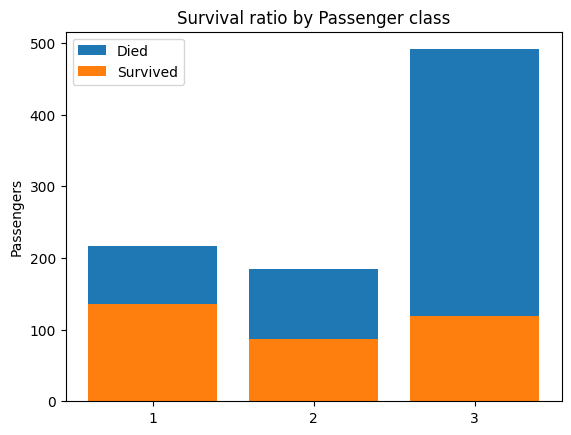

In [ ]:
index=merge_pclass.index.values
survived_ = merge_pclass.Survived
deid= merge_pclass.Total

bar_died=plt.bar(index, deid)
bar_s=plt.bar(index, survived_)

plt.xticks(index,index)
plt.ylabel('Passengers')
plt.title('Survival ratio by Passenger class')
plt.legend([bar_died,bar_s], ['Died','Survived'])


The 1st class passengers has the highest survival rate and 3rd class passengers has higher death rate

In [ ]:
def survival_rate(df,col1,col2):
  new_df=df[[col1,col2]]
  sum_df=new_df.groupby(col2).sum()
  count_df=new_df.groupby(col2).count()
  count_df.rename(columns={col1:'Total'}, inplace=True)
  merge_df=pd.merge(sum_df, count_df, left_index=True, right_index=True)
  return merge_df

In [ ]:
survival_by_gender=survival_rate(df_titanic, 'Survived','Sex')

In [ ]:
survival_by_gender['Percentage']=round((survival_by_gender['Survived']/survival_by_gender['Total'])*100,1)
survival_by_gender

,Survived,Total,Percentage
Sex,,,
female,233,314,74.2
male,109,577,18.9


<Figure size 1000x600 with 0 Axes>

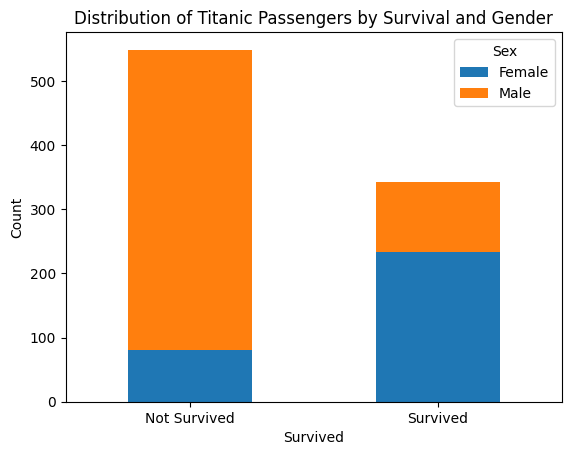

In [ ]:
plt.figure(figsize=(10, 6))
df_titanic.groupby(["Survived", "Sex"]).size().unstack().plot(kind="bar", stacked=True)
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Distribution of Titanic Passengers by Survival and Gender")
plt.legend(title="Sex", labels=["Female", "Male"])
plt.xticks(ticks=[0, 1], labels=["Not Survived", "Survived"], rotation=0)
plt.show()


% of Female survival to the male is greater this can be due to some men volunteering to work on the rescue team. This can generally affect the death rate of male-to-female

The effect of Family size using SibSp, Parch. To work around this, we need to investigate if the passenger is travelling alone or with its relative either siblins spouse or parents

### Survival by Family member

In [ ]:
not_alone=(df_titanic['SibSp']+df_titanic['Parch']) >=1
not_alone_df=df_titanic[not_alone]


In [ ]:
not_alone_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,427.796610,0.505650,2.169492,26.217514,1.316384,0.960452,48.832275
std,259.122836,0.500676,0.864520,14.932355,1.420774,1.039512,55.307615
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.495800
25%,195.000000,0.000000,1.000000,17.000000,1.000000,0.000000,18.000000
50%,419.000000,1.000000,2.000000,26.000000,1.000000,1.000000,27.750000
75%,645.750000,1.000000,3.000000,36.000000,1.000000,2.000000,59.044800
max,889.000000,1.000000,3.000000,70.000000,8.000000,6.000000,512.329200


In [ ]:
alone=(df_titanic['SibSp']+df_titanic['Parch'])==0
alone_df=df_titanic[alone]
alone_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,537.000000,537.000000,537.000000,537.000000,537.0,537.0,537.000000
mean,458.000000,0.303538,2.400372,31.152700,0.0,0.0,21.242689
std,255.714174,0.460214,0.804511,11.737766,0.0,0.0,42.223510
min,3.000000,0.000000,1.000000,5.000000,0.0,0.0,0.000000
25%,235.000000,0.000000,2.000000,23.000000,0.0,0.0,7.775000
50%,466.000000,0.000000,3.000000,27.000000,0.0,0.0,8.137500
75%,681.000000,1.000000,3.000000,36.000000,0.0,0.0,15.000000
max,891.000000,1.000000,3.000000,80.000000,0.0,0.0,512.329200


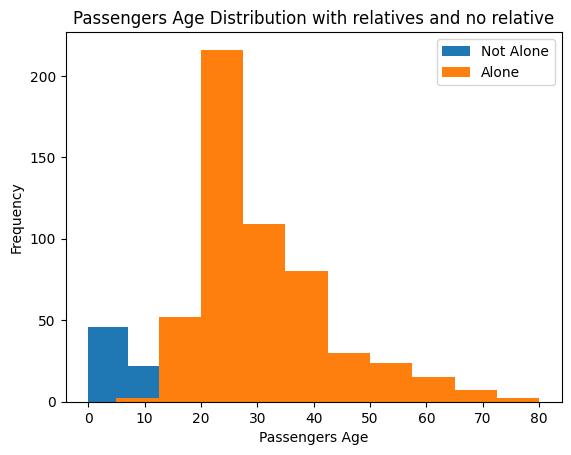

In [ ]:
plt.hist(not_alone_df['Age'])
plt.hist(alone_df['Age'])
plt.xlabel('Passengers Age')
plt.ylabel('Frequency')
plt.title('Passengers Age Distribution with relatives and no relative')
plt.legend(['Not Alone', 'Alone']);

Few Tenager within the age of 5-10 are alone which is very strange and some few septuagenarian and octagerian also boarded alone. While it is still normal for person from 15-60 years old can still travel alone

Let looks at the survival rate of passengers that are alone and not alone

In [ ]:
df_titanic['not_alone']=np.where((df_titanic['SibSp']+df_titanic['Parch'])>=1, 'Not_alone','Alone')

In [ ]:
survival_by_family_size=survival_rate(df_titanic, 'Survived','not_alone')

In [ ]:
survival_by_family_size['percentage']=round((survival_by_family_size['Survived']/survival_by_family_size['Total'])*100,1)
survival_by_family_size

,Survived,Total,percentage
not_alone,,,
Alone,163,537,30.4
Not_alone,179,354,50.6


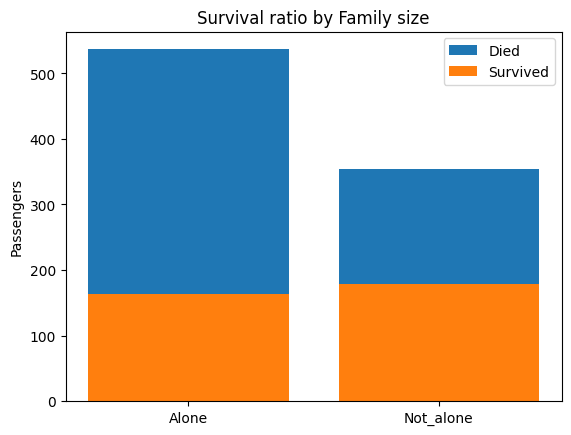

In [ ]:
index=survival_by_family_size.index.values
survived_ = survival_by_family_size.Survived
deid= survival_by_family_size.Total

bar_died_=plt.bar(index, deid)
bar_s_=plt.bar(index, survived_)

plt.xticks(index,index)
plt.ylabel('Passengers')
plt.title('Survival ratio by Family size')
plt.legend([bar_died_,bar_s_], ['Died','Survived'])

The survival rate of the passengers who are with their relatives is higher compared to the passengers who are traveling alone

### Question 3
#### Distribution of fare paid by passenger according to their class

In [ ]:
df_titanic.Pclass.unique()

array([3, 1, 2])

Text(0.5, 1.0, 'Age Distribution per Passengers Class')

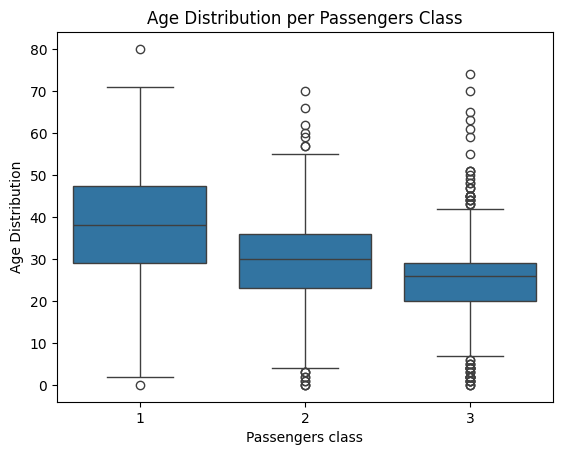

In [ ]:
sb.boxplot(data=df_titanic, x='Pclass',y='Age')
plt.ylabel('Age Distribution')
plt.xlabel('Passengers class');
plt.title('Age Distribution per Passengers Class')

Text(0.5, 1.0, 'Fare Distribution per Passengers Class')

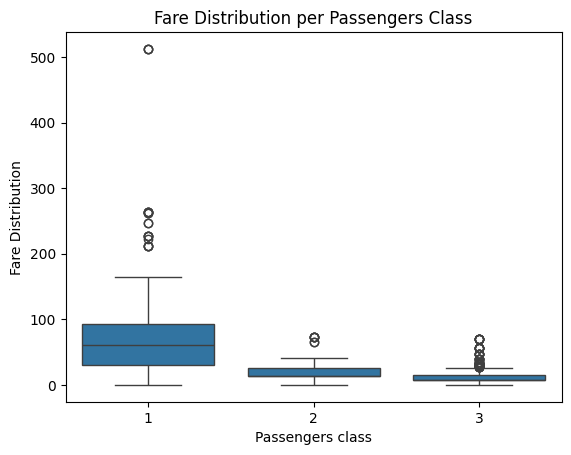

In [ ]:
sb.boxplot(data=df_titanic, x='Pclass',y='Fare')
plt.ylabel('Fare Distribution')
plt.xlabel('Passengers class');
plt.title('Fare Distribution per Passengers Class')

### Checking Relationship and Correlation between the numerical variables

In [ ]:
num_col=df_titanic.select_dtypes('number').columns
num_col

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

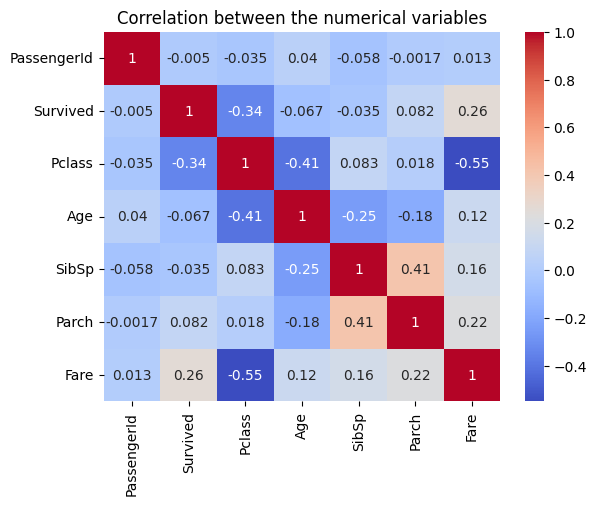

In [ ]:
sb.heatmap(df_titanic[num_col].corr(), cmap='coolwarm', annot=True)
plt.title('Correlation between the numerical variables');

The correlation among the variables is weak

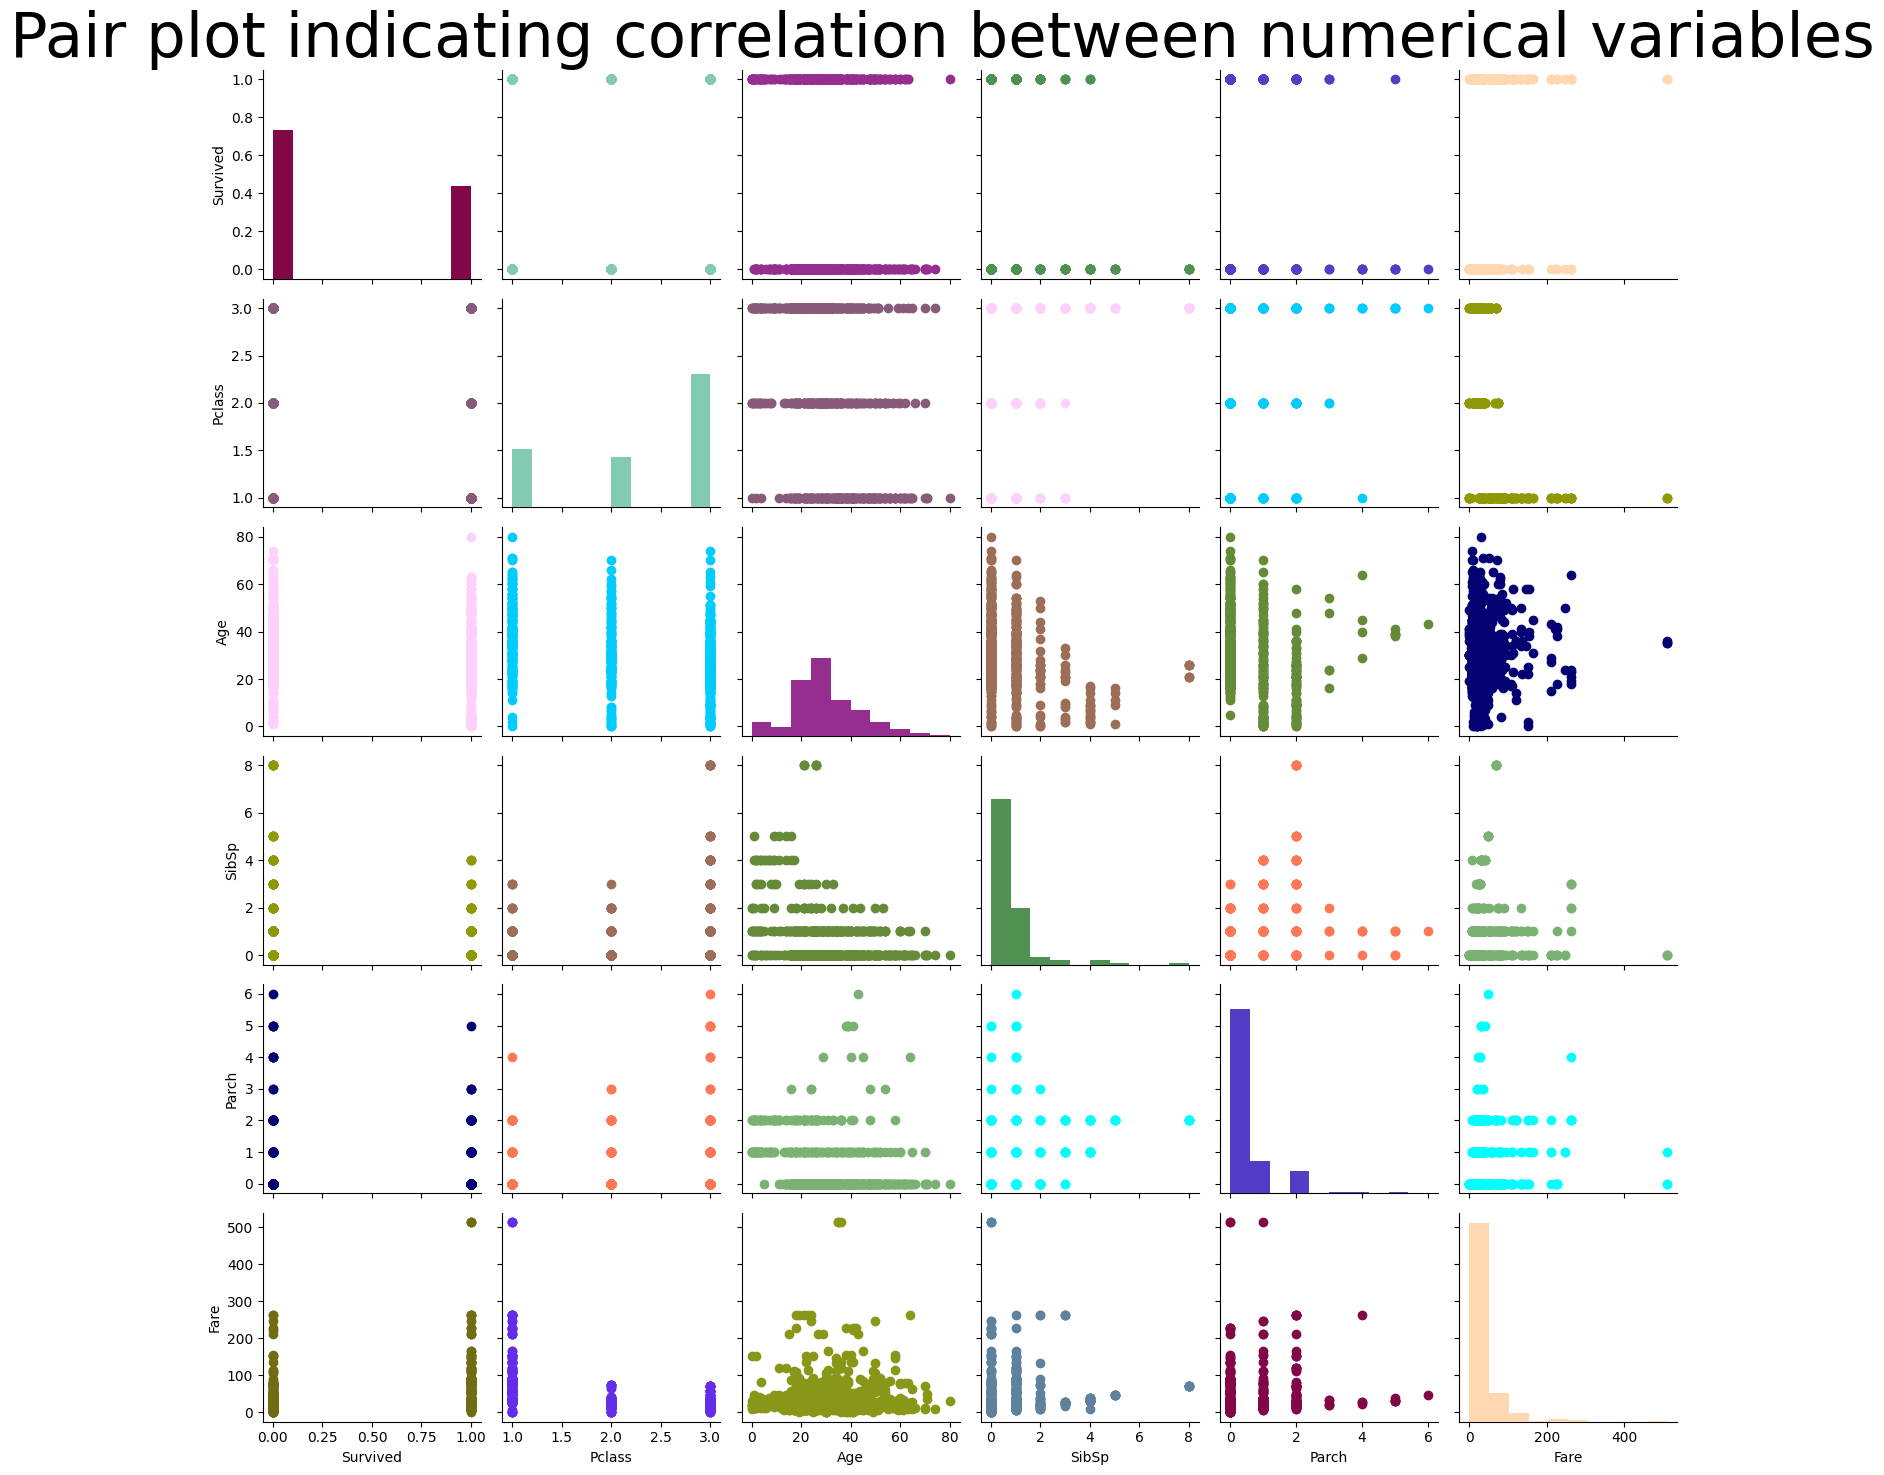

In [ ]:
#Let Check for the re;ationship between the numerical columns
colors = iter(['xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue','xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue','xkcd:red purple', 'xkcd:pale teal', 'xkcd:warm purple',
       'xkcd:light forest green', 'xkcd:blue with a hint of purple',
       'xkcd:light peach', 'xkcd:dusky purple', 'xkcd:pale mauve',
       'xkcd:bright sky blue', 'xkcd:baby poop green', 'xkcd:brownish',
       'xkcd:moss green', 'xkcd:deep blue', 'xkcd:melon',
       'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue',
        'xkcd:faded green', 'xkcd:cyan', 'xkcd:brown green',
       'xkcd:purple blue', 'xkcd:baby shit green', 'xkcd:greyish blue'])
def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)
def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)
pair_gcol=num_col[1:]
g=sb.PairGrid(data=df_titanic,vars=pair_gcol)
g.map_diag(my_hist)
g.map_offdiag(my_scatter)
g.fig.suptitle('Pair plot indicating correlation between numerical variables', fontsize=45)
g.fig.tight_layout()
plt.show()

The heatmap shows the relationship between variables. There is not much correlation between the variables

### Summary
- passengers who in the age range of working class has highest number of unsuvival rate
- Female passenger survived most
- Average age of passenger in class 1 is around 40 years
- The analysis show important of family during crises, i.e passenger who are onbord with their family has highest chance of surviving in the incident